<a href="https://colab.research.google.com/github/MehrdadJalali-KIT/InverseLinkPredcition/blob/main/CompareMLMethods_Sparcified_0_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount drive
from google.colab import drive
import os

drive.mount('/content/drive')
# Change working path
os.chdir('/content/drive/MyDrive/Research/MOF/InverseLinkPredcition')

Mounted at /content/drive


In [3]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 23.8 MB/s eta 0:00:00


Unique node labels: 9030
Filtered summary data:
 9030


<ipython-input-4-02521b5aeb22>:278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_data_filtered['PLD_category'] = pd.cut(


Epoch 1/40
179/181 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4362 - loss: 3.8957
Epoch 1: val_loss improved from inf to 1.27312, saving model to best_gcn_model.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.4374 - loss: 3.8727 - val_accuracy: 0.6734 - val_loss: 1.2731
Epoch 2/40
179/181 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6288 - loss: 1.2463
Epoch 2: val_loss improved from 1.27312 to 1.03754, saving model to best_gcn_model.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.6289 - loss: 1.2452 - val_accuracy: 0.7045 - val_loss: 1.0375
Epoch 3/40
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6495 - loss: 1.0390
Epoch 3: val_loss improved from 1.03754 to 0.91966, saving model to best_gcn_model.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.6496 - loss: 1.0388 - val_accuracy: 0.6678 - val_loss: 0.9197
Epoch 4/40
179/181 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6756 - loss: 0.9345
Epoch 4: val_loss improved from 0.9

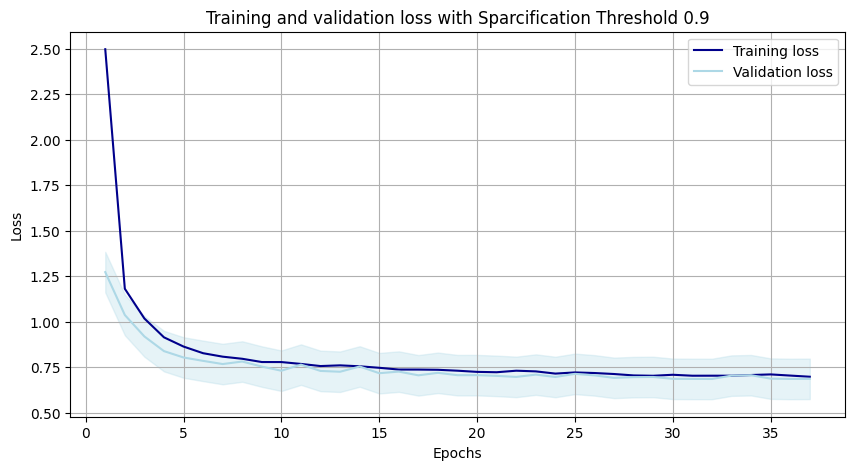

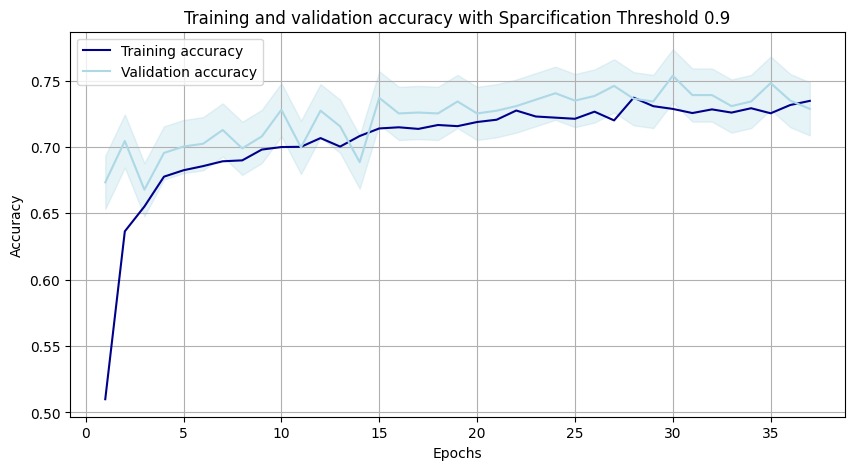

Test Accuracy: 0.7264673113822937
Test Accuracy of the best model: 0.7264673113822937
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


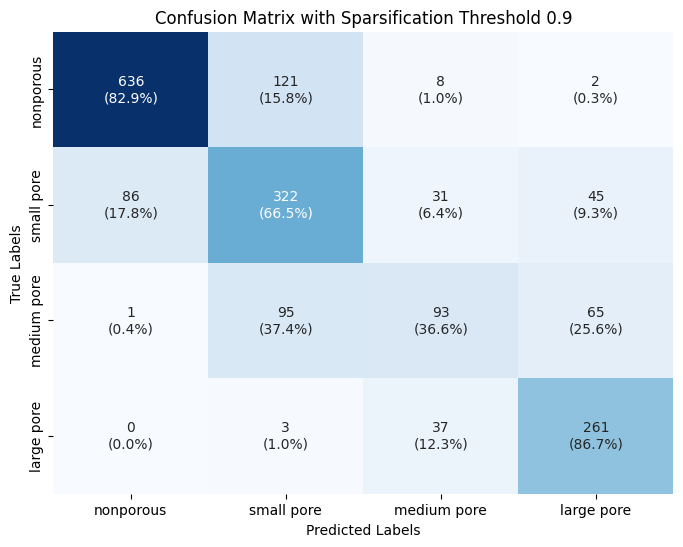

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch 1/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3992 - loss: 2.2259 - val_accuracy: 0.6519 - val_loss: 1.1261
Epoch 2/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6185 - loss: 1.1098 - val_accuracy: 0.6844 - val_loss: 0.9137
Epoch 3/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6687 - loss: 0.9561 - val_accuracy: 0.7024 - val_loss: 0.8523
Epoch 4/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6870 - loss: 0.8831 - val_accuracy: 0.7190 - val_loss: 0.8037
Epoch 5/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6998 - loss: 0.8407 - val_accuracy: 0.7176 - val_loss: 0.7863
Epoch 6/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6971 - loss: 0.8139 - val_accuracy: 0.7218 - val_loss: 0.7653
Epoch 7/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7002 - loss: 0.8073 - val_accuracy: 0.7142 - val_loss: 0.7464
Epoch 8/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7055 - loss: 0.7826 - val_accuracy: 0.

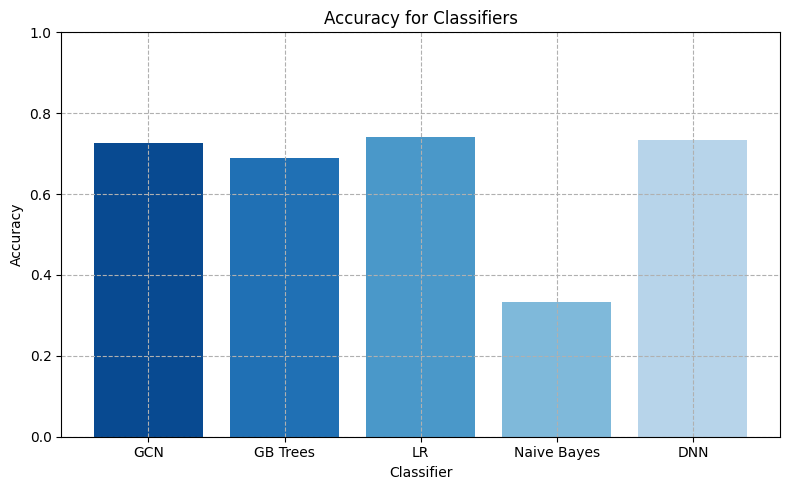

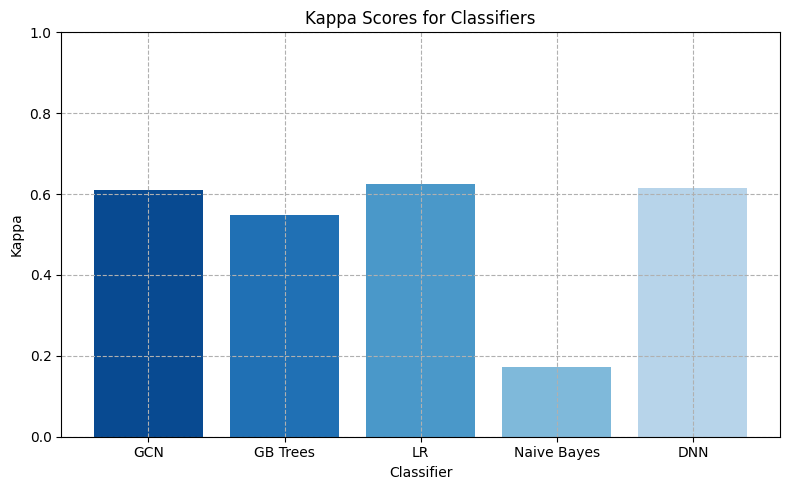

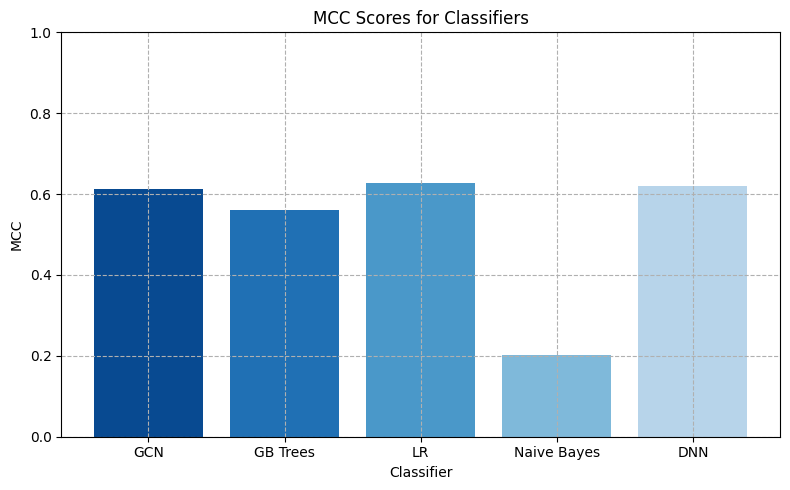

In [4]:
import pandas as pd
import numpy as np
import networkx as nx
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Dropout, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import CategoricalCrossentropy
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.metrics import confusion_matrix, cohen_kappa_score, matthews_corrcoef, roc_auc_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import random
import tensorflow as tf
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import load_model
import warnings
from rdkit import RDLogger
from tensorflow.keras import models, layers, regularizers
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
import time

threshold=0.90

# np.random.seed(56)
# random.seed(56)
# tf.random.set_seed

# Suppress specific deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Additionally, suppress RDKit warnings globally
RDLogger.DisableLog('rdApp.*')

def generate_fingerprint(smiles):
    """Generates a molecular fingerprint given a SMILES string."""
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return np.zeros((1024,), dtype=float)  # Return an array of zeros if molecule can't be parsed
        return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024), dtype=float)
    except Exception as e:
        print(f"SMILES Parse Error: {e}")
        return np.zeros((1024,), dtype=float)  # Return an array of zeros in case of an error

def plot_confusion_matrix(y_true, y_pred, classes):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Calculate percentage accuracy for each element in the confusion matrix
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Combine counts and percentages for display
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_percentage[i, j]
            annot[i, j] = f'{c}\n({p:.1f}%)'  # Count and percentage

    # Plot the confusion matrix with annotations
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', xticklabels=classes, yticklabels=classes, cbar=False)
    plt.title(f'Confusion Matrix with Sparsification Threshold {threshold}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

import numpy as np
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
    # Extract loss and accuracy from history
    loss = history.history['loss']
    val_loss = history.history.get('val_loss', None)
    accuracy = history.history['accuracy']
    val_accuracy = history.history.get('val_accuracy', None)
    epochs = range(1, len(loss) + 1)

    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss, 'darkblue', label='Training loss')  # Change color to dark blue
    if val_loss:
        plt.plot(epochs, val_loss, 'lightblue', label='Validation loss')  # Change color to light blue
        plt.fill_between(epochs, np.array(val_loss) - np.std(val_loss), np.array(val_loss) + np.std(val_loss), color='lightblue', alpha=0.3)  # Fill between mean - std and mean + std
    plt.title(f'Training and validation loss with Sparcification Threshold {threshold}')
    # plt.title('Training and Validation Loss on the Original Dataset')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, accuracy, 'darkblue', label='Training accuracy')  # Change color to dark blue
    if val_accuracy:
        plt.plot(epochs, val_accuracy, 'lightblue', label='Validation accuracy')  # Change color to light blue
        plt.fill_between(epochs, np.array(val_accuracy) - np.std(val_accuracy), np.array(val_accuracy) + np.std(val_accuracy), color='lightblue', alpha=0.3)  # Fill between mean - std and mean + std
    plt.title(f'Training and validation accuracy with Sparcification Threshold {threshold}')
    # plt.title('Training and validation accuracy on the Original Dataset')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.show()

def label_encode_metal_names(metal_names):
    """Encodes metal names as integers."""
    metal_dict = {metal: idx for idx, metal in enumerate(np.unique(metal_names))}
    return np.array([metal_dict[metal] for metal in metal_names])


# Function to train and evaluate different classifiers
def train_and_evaluate_classifier(classifier, train_features, train_labels, test_features, test_labels):
    classifier.fit(train_features, train_labels)
    accuracy = classifier.score(test_features, test_labels)
    return accuracy




def preprocess_graph(graph, features):
    # Determine the dimensionality of the feature vectors
    feature_dimension = features.shape[1]

    # Convert the graph to an adjacency matrix
    adjacency_matrix = nx.adjacency_matrix(graph).toarray()

    # Initialize an empty list to store feature vectors
    feature_vectors = []

    # Create a mapping from node labels to integer indices
    node_to_index = {node: index for index, node in enumerate(graph.nodes())}

    # Iterate over nodes in the graph
    for node in graph.nodes():
        # Get the integer index corresponding to the node label
        node_index = node_to_index[node]
        # Check if the node index is valid
        if node_index < len(features):
            # Append the feature vector corresponding to the node index
            feature_vectors.append(features[node_index])
        else:
            # If the node index is out of range, assign a default feature vector
            feature_vectors.append(np.zeros((feature_dimension,)))

    # Convert the list of feature vectors to a numpy array
    feature_matrix = np.array(feature_vectors)

    return adjacency_matrix, feature_matrix


def build_gcn_model(input_shape_feature, input_shape_adjacency, num_classes):
    # Define input layers
    x_inp_feature = Input(shape=(input_shape_feature,))
    x_inp_adjacency = Input(shape=(input_shape_adjacency,))

    # Feature processing with multiple layers
    x_feature = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x_inp_feature)
    x_feature = Dropout(0.5)(x_feature)
    x_feature = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x_feature)
    x_feature = Dropout(0.3)(x_feature)

    # Adjacency processing with multiple layers
    x_adjacency = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x_inp_adjacency)
    x_adjacency = Dropout(0.5)(x_adjacency)
    x_adjacency = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x_adjacency)
    x_adjacency = Dropout(0.3)(x_adjacency)

    # Concatenate feature and adjacency outputs
    x = concatenate([x_feature, x_adjacency])

    # Output layer
    output = Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs=[x_inp_feature, x_inp_adjacency], outputs=output)

    # Using a smaller learning rate
    optimizer = Adam(learning_rate=0.0009)

    # Compile model
    model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

    return model



def build_feedforward_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.5),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model



from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

def train_gcn_model(model, adjacency_matrix, feature_matrix, labels, epochs, batch_size):
    if model is not None and adjacency_matrix is not None and feature_matrix is not None and labels is not None:
        # Early stopping to prevent overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # ModelCheckpoint to save the best model
        model_checkpoint = ModelCheckpoint('best_gcn_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

        # Train the model
        start_time = time.time()
        # Train the model
        history = model.fit([feature_matrix, adjacency_matrix], labels,
                            epochs=epochs, batch_size=batch_size,
                            validation_split=0.2, callbacks=[early_stopping, model_checkpoint])
        end_time = time.time()

        # Calculate total training time
        total_training_time = end_time - start_time
        print(f"Total training time: {total_training_time:.2f} seconds")

        return history
    else:
        print("Error: One or more input arguments to train_gcn_model is None.")


from sklearn.model_selection import train_test_split

if __name__ == "__main__":
    edges_list_filename = 'sparsified_graph_edges_0.9.csv'
    # edges_list_filename ='edges_list_0.8_Full.csv'
    summary_data_filename = '1M1L3D_summary.csv'

    # Load data
    edges_list = pd.read_csv(edges_list_filename, header=None, names=['source', 'target', 'weight'], delimiter=' ')
    summary_data = pd.read_csv(summary_data_filename)

    node_labels_source = edges_list['source'].astype(str).unique()
    node_labels_target = edges_list['target'].astype(str).unique()
    node_labels = np.unique(np.concatenate((node_labels_source, node_labels_target)))
    node_labels = list(set(node_labels))

    print("Unique node labels:", len(node_labels))

    summary_data_filtered = summary_data[summary_data['refcode'].isin(node_labels)]
    print("Filtered summary data:\n", len(summary_data_filtered))

    if not summary_data_filtered.empty:
        linker_smiles = summary_data_filtered['linker SMILES']
        if not linker_smiles.empty:
            # Generate features

            linker_features = np.stack(linker_smiles.dropna().apply(generate_fingerprint).values)
            metal_names = summary_data_filtered['metal']
            metal_features = label_encode_metal_names(metal_names).reshape(-1, 1)

            other_features = summary_data_filtered[['Largest Cavity Diameter', 'Largest Free Sphere']].values.astype('float32')
            features = np.concatenate((linker_features, metal_features, other_features), axis=1)

            # Generate labels
            summary_data_filtered['PLD_category'] = pd.cut(
                summary_data_filtered['Pore Limiting Diameter'],
                bins=[-np.inf, 2.4, 4.4, 5.9, np.inf],
                labels=['nonporous', 'small pore', 'medium pore', 'large pore']
            )
            labels = pd.get_dummies(summary_data_filtered['PLD_category']).values

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=56)

            # Load the sparsified graph
            graph = nx.read_weighted_edgelist(edges_list_filename)

            # Preprocess the graph data
            adjacency_matrix, feature_matrix = preprocess_graph(graph, features)

            # Split the adjacency and feature matrices accordingly
            adj_train, adj_test, feat_train, feat_test = train_test_split(adjacency_matrix, feature_matrix, test_size=0.2, random_state=56)

            # Provide the number of classes
            num_classes = labels.shape[1]

            # Build the GCN model
            gcn_model = build_gcn_model(feat_train.shape[1], adj_train.shape[1], num_classes)

            # Train the GCN model
            history = train_gcn_model(gcn_model, adj_train, feat_train, y_train, epochs=40, batch_size=32)
            plot_loss_accuracy(history)
            threshold=0.9
            # Save the trained GCN model
            gcn_model.save("gcn_model_0.9.h5")
            # gcn_model.save("gcn_model_original.h5")
            # Save the adjacency matrix
            np.save("adjacency_matrix_0.9.npy", adjacency_matrix)

            # Evaluate the model on the test set
            test_loss, test_accuracy = gcn_model.evaluate([feat_test, adj_test], y_test, verbose=0)
            print(f'Test Accuracy: {test_accuracy}')


            # Load the best model saved by ModelCheckpoint
            best_gcn_model = load_model('best_gcn_model.keras')

            # Now evaluate the best saved model on the test data
            test_loss, test_accuracy = best_gcn_model.evaluate([feat_test, adj_test], y_test, verbose=0)
            print(f'Test Accuracy of the best model: {test_accuracy}')

            # Generate predictions on the test set
            y_pred = np.argmax(gcn_model.predict([feat_test, adj_test]), axis=1)
            y_true = np.argmax(y_test, axis=1)

            # Define class labels
            classes = ['nonporous', 'small pore', 'medium pore', 'large pore']
              # Plot loss and accuracy

            # Plot confusion matrix for the test set
            plot_confusion_matrix(y_true, y_pred, classes)


            # Train and evaluate GCN
            y_pred_gcn = np.argmax(gcn_model.predict([feat_test, adj_test]), axis=1)
            y_true_gcn = np.argmax(y_test, axis=1)
            gcn_accuracy = accuracy_score(y_true_gcn, y_pred_gcn)
            gcn_kappa = cohen_kappa_score(y_true_gcn, y_pred_gcn)
            gcn_mcc = matthews_corrcoef(y_true_gcn, y_pred_gcn)

            train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)
            # Train and evaluate Gradient Boosted Trees
            gbt_classifier = GradientBoostingClassifier(n_estimators=50, learning_rate=0.01, max_depth=2)
            gbt_classifier.fit(train_features, np.argmax(train_labels, axis=1))
            gbt_pred = gbt_classifier.predict(test_features)
            gbt_accuracy = accuracy_score(np.argmax(test_labels, axis=1), gbt_pred)
            gbt_kappa = cohen_kappa_score(np.argmax(test_labels, axis=1), gbt_pred)
            gbt_mcc = matthews_corrcoef(np.argmax(test_labels, axis=1), gbt_pred)

            from sklearn.linear_model import LogisticRegression
            from sklearn.metrics import accuracy_score, cohen_kappa_score, matthews_corrcoef

            # Train and evaluate Logistic Regression
            logreg_classifier = LogisticRegression(max_iter=500)  # You can adjust max_iter if necessary
            logreg_classifier.fit(train_features, np.argmax(train_labels, axis=1))  # Train the model

            logreg_pred = logreg_classifier.predict(test_features)  # Make predictions on the test set

            # Calculate evaluation metrics
            logreg_accuracy = accuracy_score(np.argmax(test_labels, axis=1), logreg_pred)
            logreg_kappa = cohen_kappa_score(np.argmax(test_labels, axis=1), logreg_pred)
            logreg_mcc = matthews_corrcoef(np.argmax(test_labels, axis=1), logreg_pred)

            # Train and evaluate Naive Bayes
            nb_classifier = GaussianNB()
            nb_classifier.fit(train_features, np.argmax(train_labels, axis=1))
            nb_pred = nb_classifier.predict(test_features)
            nb_accuracy = accuracy_score(np.argmax(test_labels, axis=1), nb_pred)
            nb_kappa = cohen_kappa_score(np.argmax(test_labels, axis=1), nb_pred)
            nb_mcc = matthews_corrcoef(np.argmax(test_labels, axis=1), nb_pred)


            feedforward_model = build_feedforward_model(train_features.shape[1], train_labels.shape[1])
            feedforward_model.fit(train_features, train_labels, epochs=20, batch_size=32, validation_split=0.2)
            # Evaluate the model on the test set
            feedforward_loss, feedforward_accuracy = feedforward_model.evaluate(test_features, test_labels)

            # Convert one-hot predictions and labels to class indices
            feedforward_predictions = np.argmax(feedforward_model.predict(test_features), axis=1)
            true_labels = np.argmax(test_labels, axis=1)

            # Calculate Kappa and MCC for DNN
            dnn_kappa = cohen_kappa_score(true_labels, feedforward_predictions)
            dnn_mcc = matthews_corrcoef(true_labels, feedforward_predictions)




            # Define your classifiers and evaluation metrics
            classifiers = ['GCN', 'GB Trees', 'LR', 'Naive Bayes', 'DNN']
            accuracies = [gcn_accuracy, gbt_accuracy, logreg_accuracy, nb_accuracy, feedforward_accuracy]
            kappa_scores = [gcn_kappa, gbt_kappa, logreg_kappa, nb_kappa, dnn_kappa]
            mcc_scores = [gcn_mcc, gbt_mcc, logreg_mcc, nb_mcc, dnn_mcc]


            # Print evaluation metrics
            print("Classifier Evaluation Metrics:")
            for clf, acc, kappa, mcc in zip(classifiers, accuracies, kappa_scores, mcc_scores):
                print(f"{clf}: Accuracy={acc:.3f}, Kappa={kappa:.3f}, MCC={mcc:.3f}")

            # Plot all metrics in the same style
            colors = plt.cm.Blues(np.linspace(0.9, 0.3, len(classifiers)))

            # Plot accuracy
            plt.figure(figsize=(8, 5))
            plt.bar(classifiers, accuracies, color=colors)
            plt.title('Accuracy for Classifiers')
            plt.xlabel('Classifier')
            plt.ylabel('Accuracy')
            plt.ylim(0, 1)  # Start from 0, no negative values
            plt.grid(True, which="both", ls="--")
            plt.tight_layout()
            plt.show()

            # Plot kappa scores
            plt.figure(figsize=(8, 5))
            plt.bar(classifiers, kappa_scores, color=colors)
            plt.title('Kappa Scores for Classifiers')
            plt.xlabel('Classifier')
            plt.ylabel('Kappa')
            plt.ylim(0, 1)  # Start from 0
            plt.grid(True, which="both", ls="--")
            plt.tight_layout()
            plt.show()

            # Plot MCC scores
            plt.figure(figsize=(8, 5))
            plt.bar(classifiers, mcc_scores, color=colors)
            plt.title('MCC Scores for Classifiers')
            plt.xlabel('Classifier')
            plt.ylabel('MCC')
            plt.ylim(0, 1)  # Start from 0
            plt.grid(True, which="both", ls="--")
            plt.tight_layout()
            plt.show()




        else:
            print("Error: linker_smiles column is empty.")
    else:
        print("Error: summary_data_filtered DataFrame is empty.")